# Drawing XZ: focal area of an apheric lens

In [1]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_masks_X import Scalar_mask_X

from diffractio.utils_math import ndgrid

import matplotlib.cm as cm

number of processors: 8


In [2]:
from matplotlib import rcParams
rcParams['figure.figsize']=[8,5]
rcParams['figure.dpi']=125

## lens

In [3]:
x0 = np.linspace(-250*um, 250*um, 1024*4)
z0 = np.linspace(-0.1 * mm, .6*mm, 1024*4)
wavelength = 10 * um

In [4]:
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

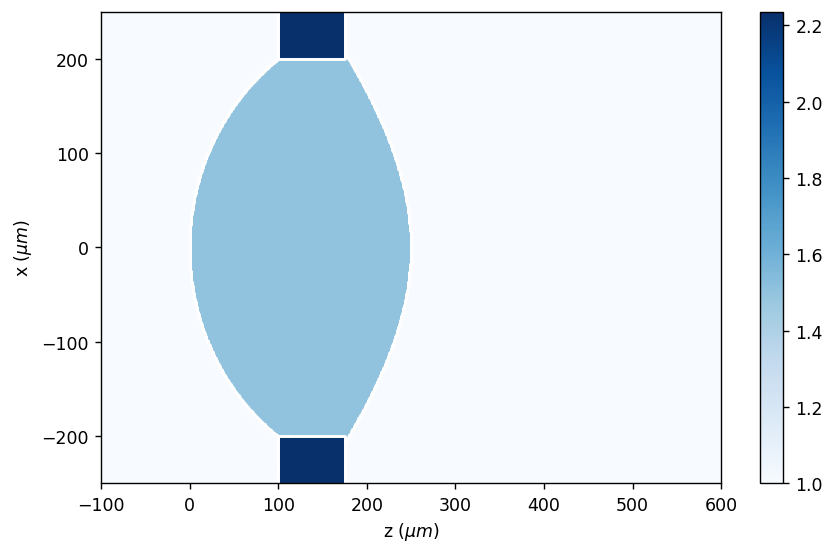

In [5]:
lente2 = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info='')
ipasa, conds= lente2.aspheric_lens(r0=(0*mm,0*mm), angle=(0*degrees, (0*mm,0*mm)), 
                                   refraction_index=1.5, 
                                   cx=(1/(.25*mm),-1/(.25*mm)),Qx=(0,0), 
                                   a2=(0,1e-13), a3=(0,0), a4=(0,0),
                                   depth=.25*mm,  size=0.8*mm)

lente2.slit(r0=(0,100*um),
    aperture=400*um,
    depth=75*um,
    refraction_index=1+2j)


lente2.draw_refraction_index(draw_borders=True, min_incr=0.01,colormap_kind=cm.Blues, colorbar_kind='vertical');

In [6]:
lente2.incident_field(u0)

In [7]:
lente2.clear_field()
lente2.WPM(verbose=False)

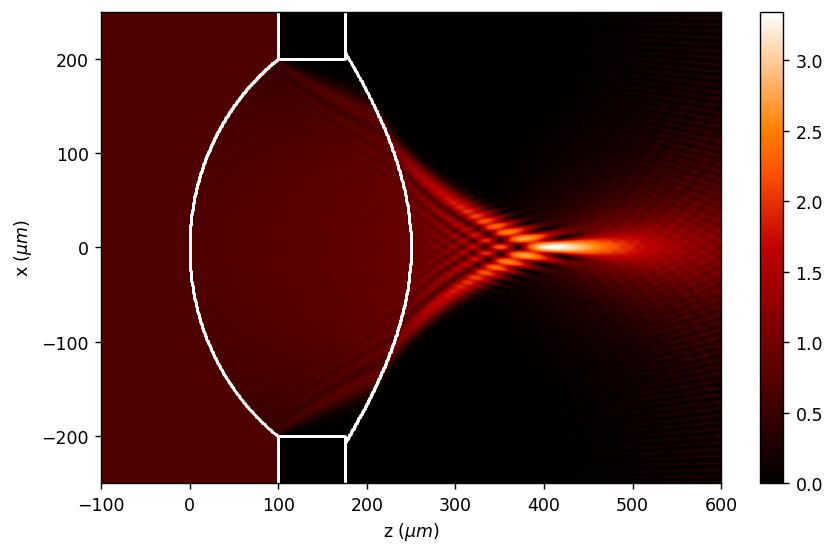

In [8]:
lente2.draw(kind='intensity',logarithm=True, normalize=None, draw_borders=True,
            colorbar_kind='vertical');

In [9]:
Intensity_WPM = lente2.intensity()

In [10]:
x_f,z_f = lente2.search_focus()

x = -0.061 um, z = 415.897 um


In [11]:
ylim_max=50*um
zlim_max=100*um

## Intensity

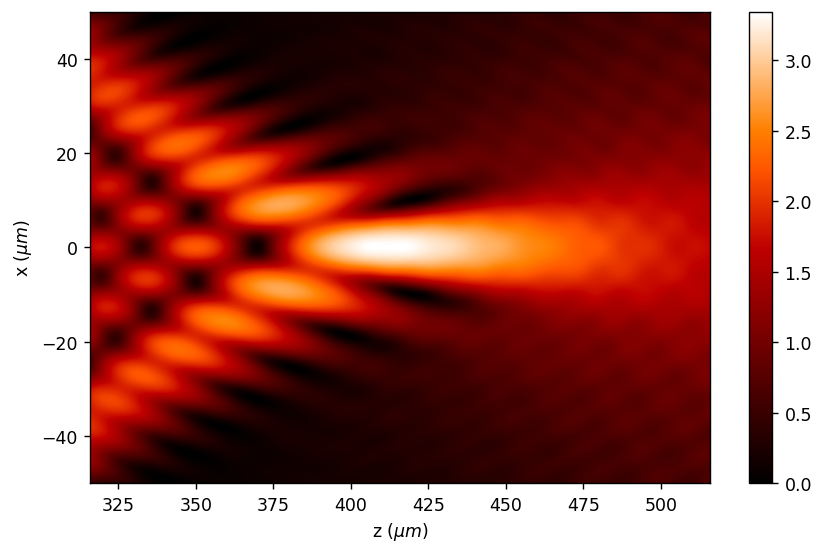

In [12]:
lente2.draw(kind='intensity',logarithm=True,  colorbar_kind='vertical')
plt.ylim(-ylim_max,ylim_max)
plt.xlim(z_f-zlim_max,z_f+zlim_max);

## Amplitude

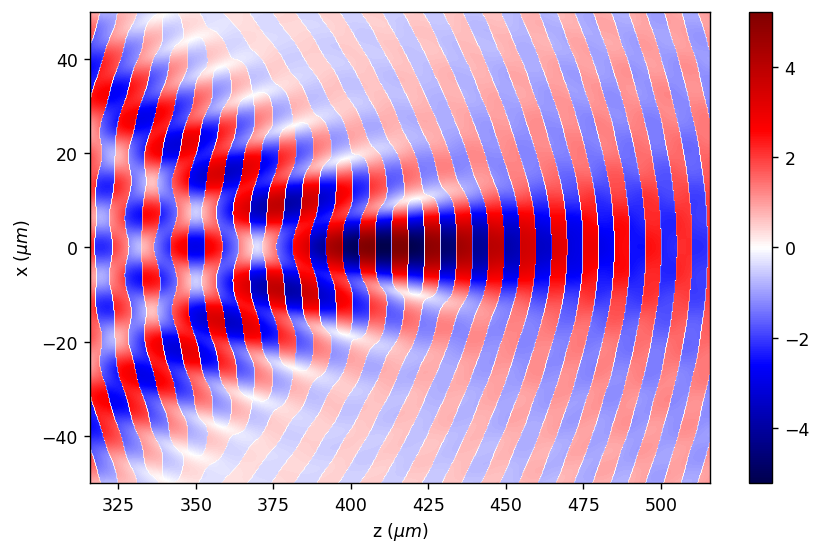

In [13]:
lente2.draw(kind='amplitude', colorbar_kind='vertical')
plt.ylim(-ylim_max,ylim_max)
plt.xlim(z_f-zlim_max,z_f+zlim_max);

## Phase

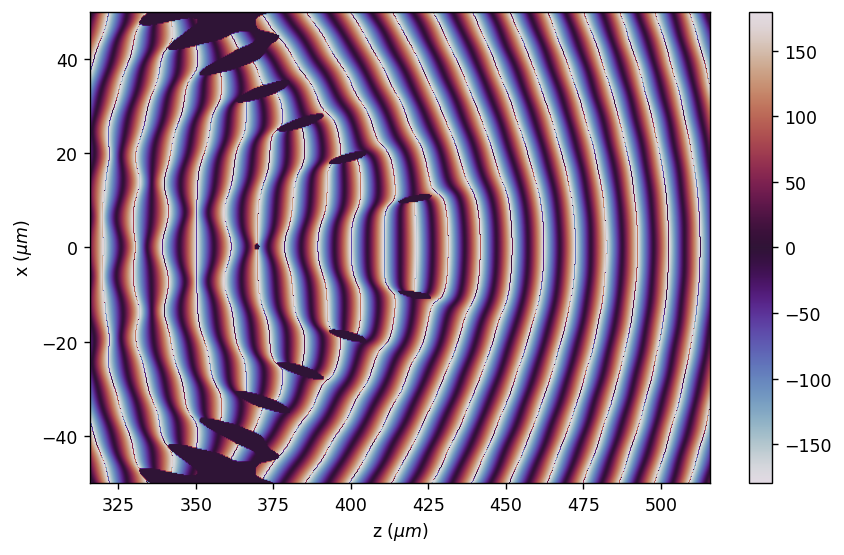

In [14]:
lente2.draw(kind='phase', draw_borders=True, colorbar_kind='vertical')
plt.ylim(-ylim_max,ylim_max)
plt.xlim(z_f-zlim_max,z_f+zlim_max);

## Real

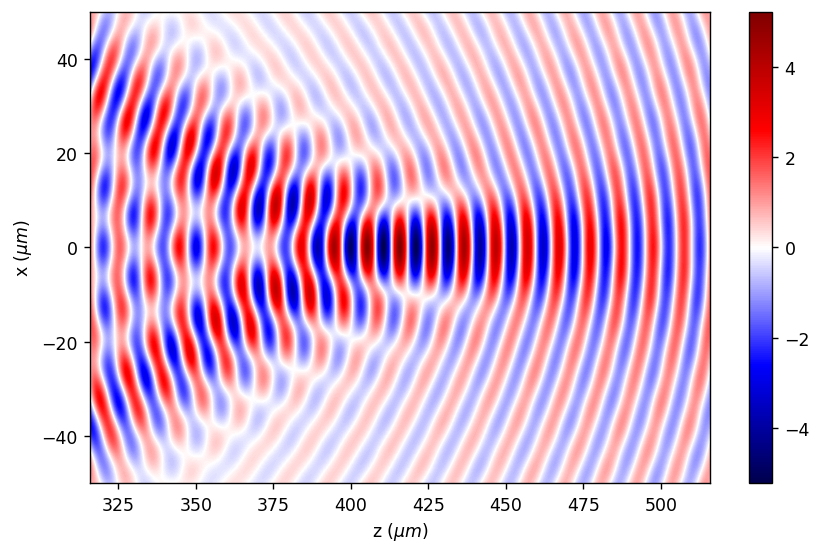

In [15]:
lente2.draw(kind='real',  colorbar_kind='vertical')
plt.ylim(-ylim_max,ylim_max)
plt.xlim(z_f-zlim_max,z_f+zlim_max);

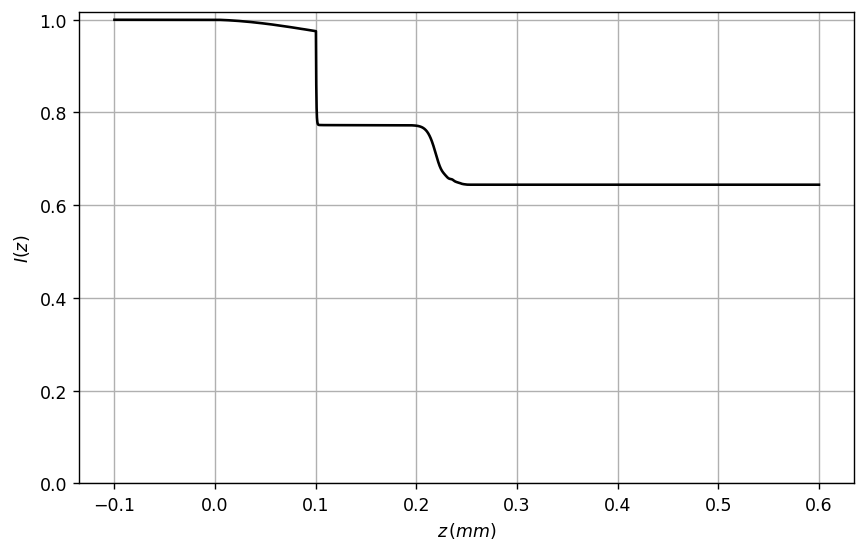

In [16]:
lente2.check_intensity();

### Longitudinal and transversal profiles

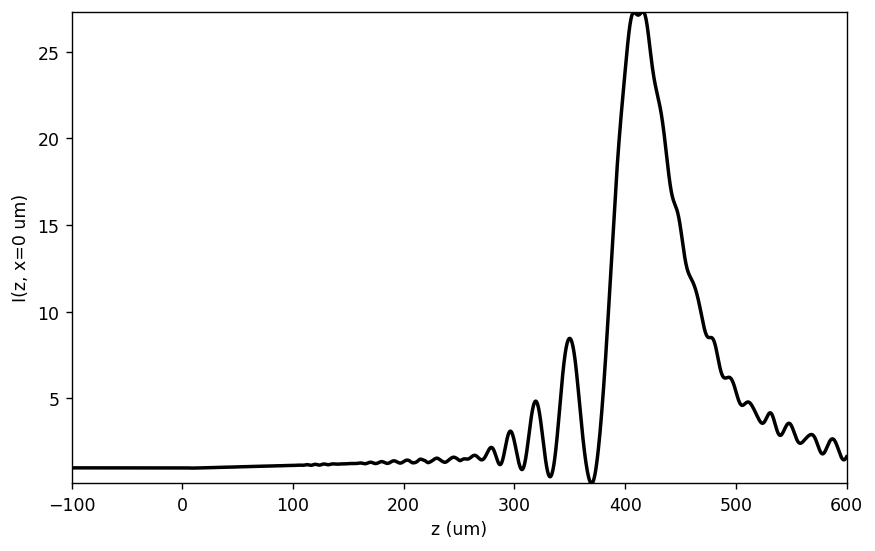

In [17]:
lente2.profile_longitudinal(kind='intensity', logarithm=False, x0=x_f);

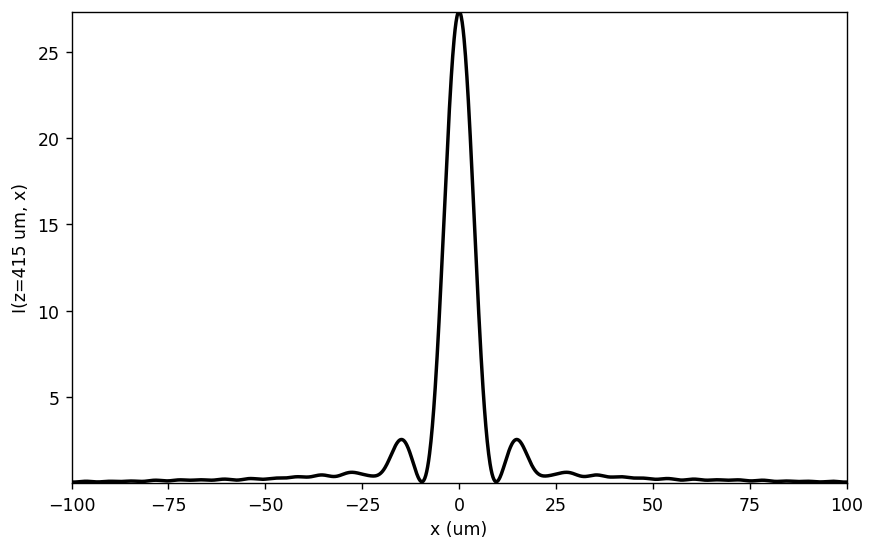

In [18]:
lente2.profile_transversal(kind='intensity', logarithm=False, z0=z_f)
plt.xlim(-100,100);

### Videos of the XZ profiles

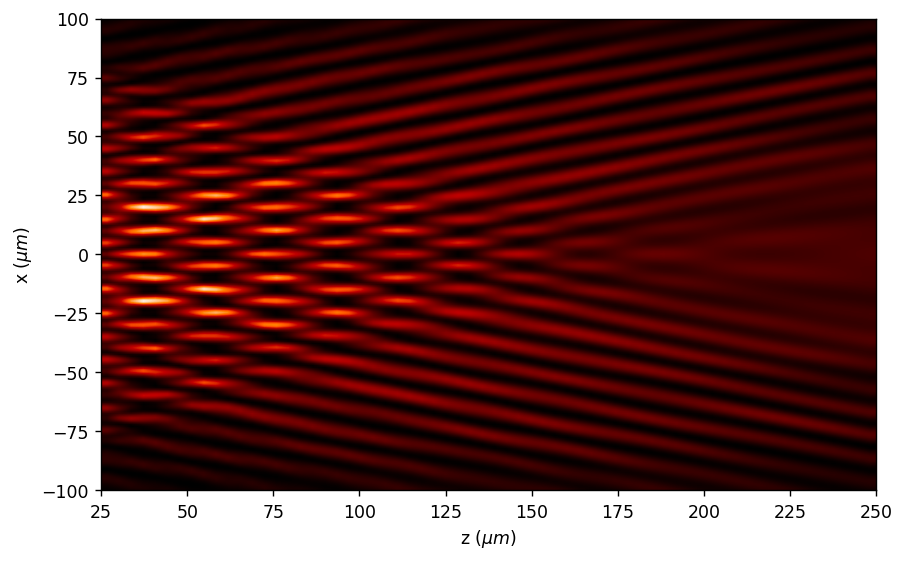

In [19]:
filename = 'video_xz'

length = 200 * um
wavelength = 5 * um
period = 25 * um
z_talbot = 2 * period**2 / wavelength
x0 = np.linspace(-length / 2, length / 2, 256)
z0 = np.linspace(25 * um, 1 * z_talbot, 64)

u0 = Scalar_source_X(x0, wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=-100 * um, w0=100 * um, theta=0 * degrees)

t1 = Scalar_mask_X(x0, wavelength)
t1.ronchi_grating(period=10 * um, x0=0 * um, fill_factor=0.5)

u1 = Scalar_field_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(t1 * u0)
u1.RS()

u1.draw(
    kind='intensity',
    logarithm=False,
    normalize='maximum',
    draw_borders=True,
    filename='');

In [20]:
u1.video_profiles(
    kind='intensity',
    kind_profile='transversal',
    wait=0.001,
    logarithm=True,
    normalize='maximum',
    filename=filename + "_int_trans.avi")

u1.video_profiles(
    kind='intensity',
    kind_profile='longitudinal',
    wait=0.001,
    logarithm=True,
    normalize='maximum',
    filename=filename + "_int_long.avi")

u1.video_profiles(
    kind='phase',
    kind_profile='transversal',
    wait=0.001,
    logarithm=True,
    normalize='maximum',
    filename=filename + "_pha_trans.avi")

## Visualizing fields using interactive tools

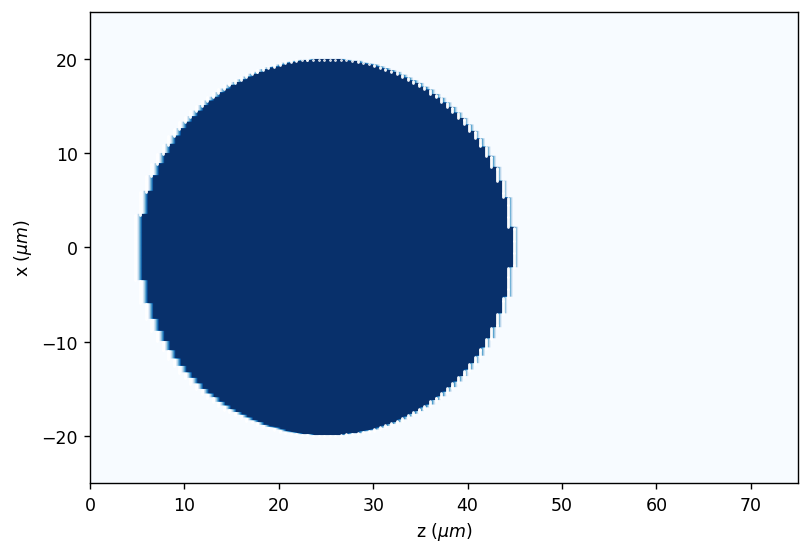

In [21]:
x0 = np.linspace(-25 * um, 25 * um, 512)
z0 = np.linspace(0 * um, 75 * um, 128)
wavelength = 5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
u1.mask_field(size_edge=5 * um)
u1.sphere(
    r0=(0 * um, 25 * um), radius=(20 * um, 20 * um), refraction_index=1.5)
u1.draw_refraction_index(scale='scaled')

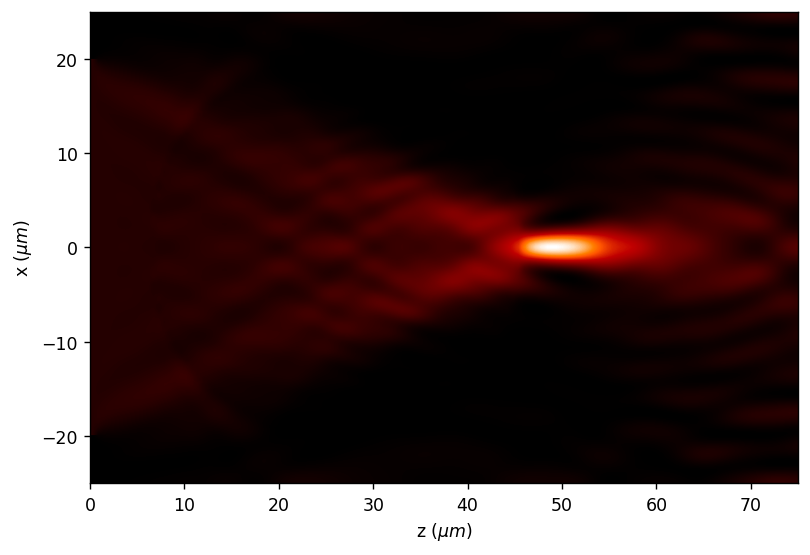

In [22]:
u1.WPM(verbose=False)
u1.draw(scale='scaled')

In [25]:
%matplotlib widget
u1.draw_profiles_interactive(kind='intensity');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

![](profile.png)

In [24]:
%matplotlib inline